# Projeto 2 - Ciência dos Dados

**Dataset:** [https://www.kaggle.com/vicsuperman/prediction-of-music-genre](https://www.kaggle.com/vicsuperman/prediction-of-music-genre)

- Lucas Gurgel
- Gabriela Albuquerque
- João Pedro Lima
- Pedro Fracassi

## Índice

- [Introdução](#introducao)
- [Análise Exploratória](#analise)

In [240]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

# decision tree classifier sklearn
# random forest


In [241]:
print(f'Esperamos trabalhar no diretório {os.getcwd()}')

Esperamos trabalhar no diretório c:\Users\Joao\Projeto_2_Cdados


<div id="introducao">

# Introdução

Nosso Projeto 2 de Cdados será baseado em analise/previsão do gênero musical de uma determinada pessoa. Essa 'previsão' terá como parâmetros informações como 'nome do artista', 'instrumentalidade', 'energia' e entre outros. A descrição do nosso problema é baseado em uma pessoa não saber o seu estilo musical dessa maneira com a construção do nosso projeto dois, conseguiremos fazer uma previsão em qual estimo musical determinada pessoa está mais inserida.

# Contextualização

Atualmente, com a evolução da tecnologia tornou se possível a construção de uma comunidade baseado em seus gostos musicais a fim de criar uma maior interatividade entre as pessoas. Entretanto muitas pessoas não sabem o estilo  em que está mais inserido e com isso acaba não interagindo com pessoas que gostam dos mesmos artistas, estilos musicais. Portanto, o objetivo desse projeto é classificar/prever  o gênero musical de uma determinada pessoa. Sendo que essa  'previsão' terá como parâmetros informações como 'nome do artista', 'instrumentalidade', 'energia' e entre outros para que seja possível a realização da classificação/previsão.

## Entendendo as features

- **`artist_name`** - Nome do artista.
- **`track_name`** - Nome da música.
- **`popularity`** - Popularidade da música.
- **`acousticness`** - Acústica da música, Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica.
- **`danceability`** - Descreve como uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, intensidade da batida e regularidade geral.
- **`duration_ms`** - Duração da música em milissegundos.
- **`energy`** - Representa a intensidade e atividade, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach tem pontuação baixa na escala.
- **`instrumentalness`** - Prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou palavra falada são claramente “vocais”.
- **`key`** - A chave geral estimada da pista. Os inteiros mapeiam para arremessos usando a notação de classe de arremesso padrão. Por exemplo. 0 = C, 1 = C♯ / D ♭, 2 = D e assim por diante.
- **`liveness`** - Detecta a presença de um público na gravação. Valores de vivacidade mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo.
- **`loudness`** - O volume geral de uma faixa em decibéis (dB). Os valores de sonoridade são calculados em toda a trilha e são úteis para comparar a sonoridade relativa das trilhas.
- **`mode`** -Indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0
- **`speechiness`** - Isso detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo.
- **`tempo`** - O tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo.
- **`valence`** - Descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, com raiva).
- **`music_genre`** - Genero musical da música, como pop, rock, funk, etc. **(Target)**


In [262]:

df = pd.read_csv('music_genre.csv').drop(['obtained_date'], axis=1) 

df.drop(['artist_name', 'track_name', 'instance_id'], axis=1, inplace=True)
df = df[df.tempo != '?'] # Por algum motivo tinham algumas linhas com uma "?" no lugar do tempo

df.dropna(inplace=True)

df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['tempo'] = df['tempo'].astype('float')
df = df[df.duration_ms > 0]


df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic


Através do `.value_counts` executado abaixo, é possível perceber que o dataset é perfeitamente balanceado entre os diferentes gêneros musicais, com 5 mil linhas de cada um.

In [243]:
df['music_genre'].value_counts().to_frame()

,music_genre
Rock,4099
Hip-Hop,4077
Jazz,4064
Anime,4064
Alternative,4051
Country,4049
Blues,4046
Rap,4042
Classical,4036
Electronic,4032


<div id="analise">

## Análise Exploratória dos Dados

Na análise exploratória, nosso objetivo é descobrir quais variáveis são significantes para a predição.

Antes de começar a análise, criamos uma função auxiliar para plotar histogramas daquela feature em cada gênero musical.

In [244]:

# TODO: Limitar Y

generos = df['music_genre'].unique()

def histogramas(feature):
  faixa = np.arange(df[feature].min(), df[feature].max(), df[feature].max()/20)

  # Dry run pra descobrir o Y máximo
  maxY = 0
  for (i, genero) in enumerate(generos):
    plt.figure(1)
    gen = df[df['music_genre'] == genero]
    if gen.shape[0] == 0:
          continue
    y, x, _ = plt.hist(gen[feature], bins=faixa,color='cyan', density=True, label=feature)
    if y.max() > maxY:
      maxY = y.max()
    plt.close(1)

  plt.figure(figsize=(20,10))
  for (i, genero) in enumerate(generos):
    gen = df[df['music_genre'] == genero]
    if gen.shape[0] == 0:
      continue
    plt.subplot(2, int(np.ceil(len(generos)/2)), i+1)
    plt.ylim((0, maxY+maxY/20))
    y, x, _ = plt.hist(gen[feature], bins=faixa,color='cyan', density=True, label=feature)
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.title(genero)

### `popularity` x `music_genre`

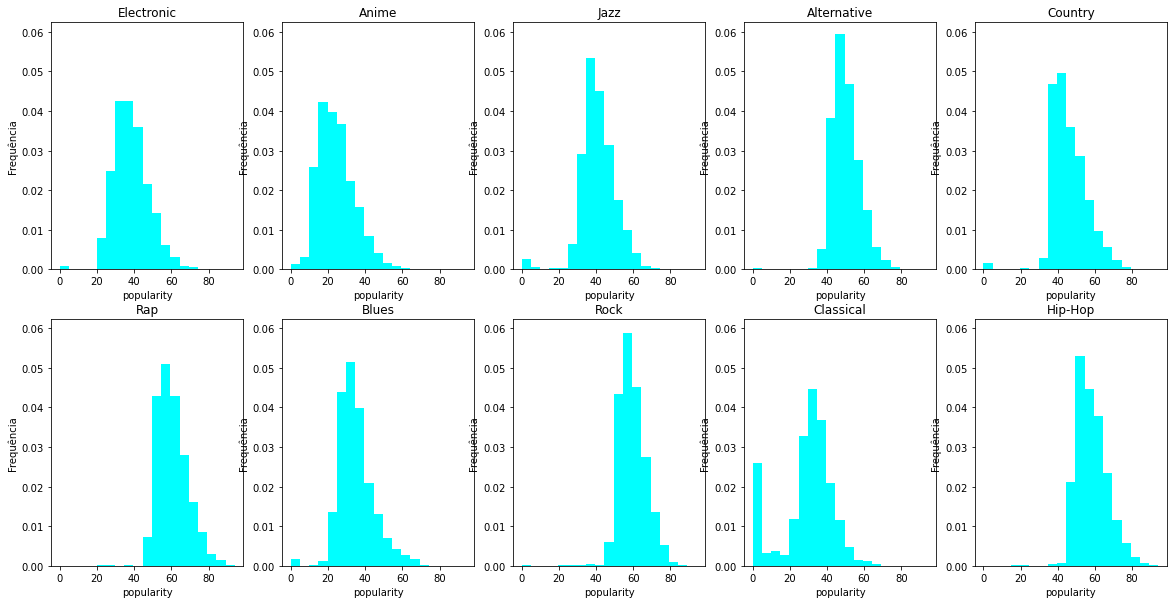

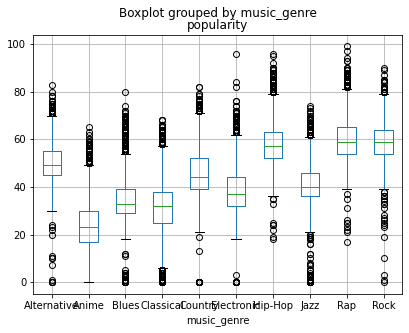

In [245]:
feature = 'popularity'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `acousticness` x `music_genre`

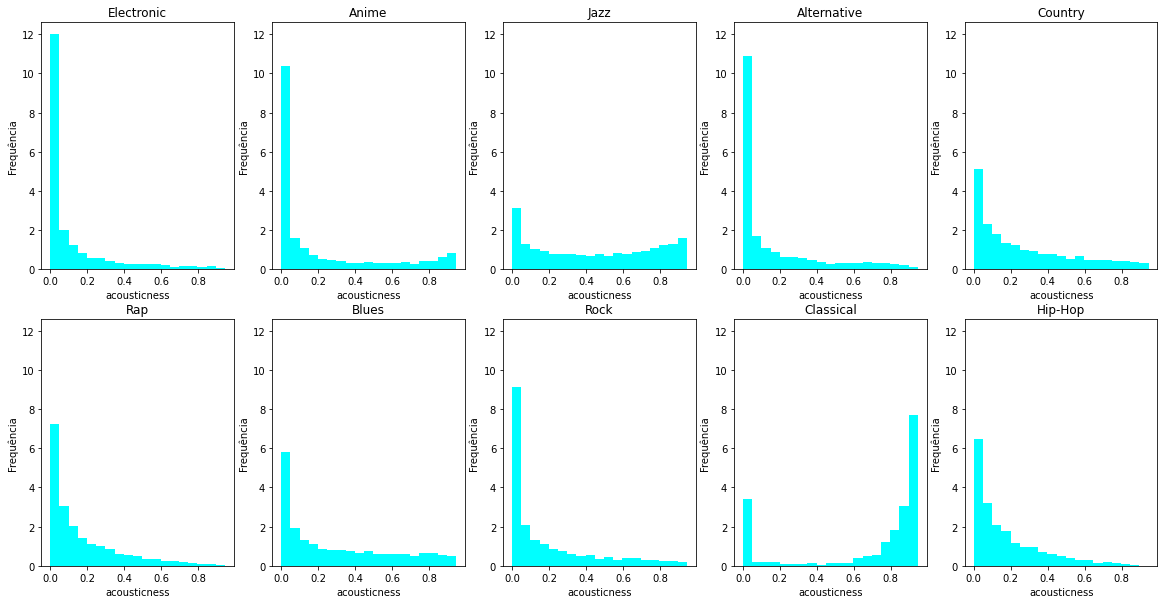

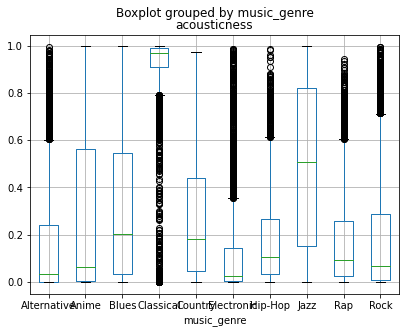

In [246]:
feature = 'acousticness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `danceability` x `music_genre`

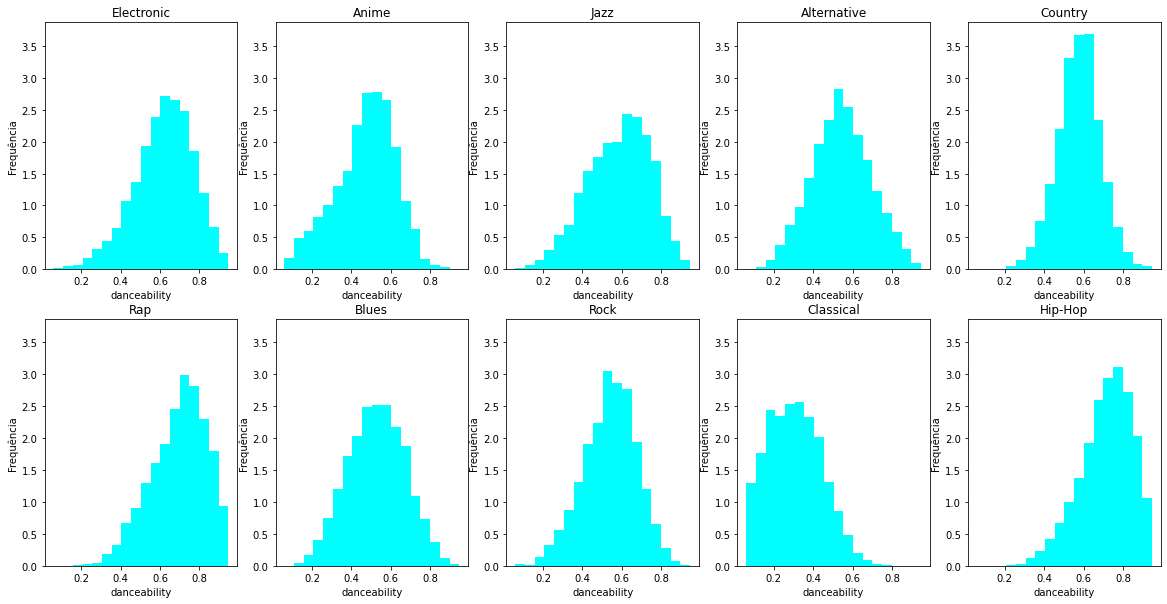

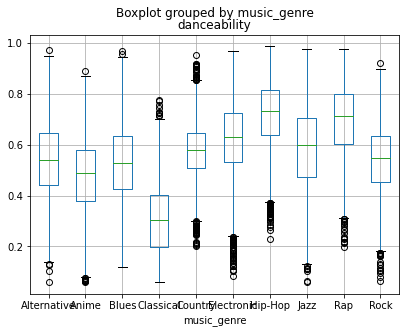

In [247]:
feature = 'danceability'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `duration(ms)` x `music_genre`

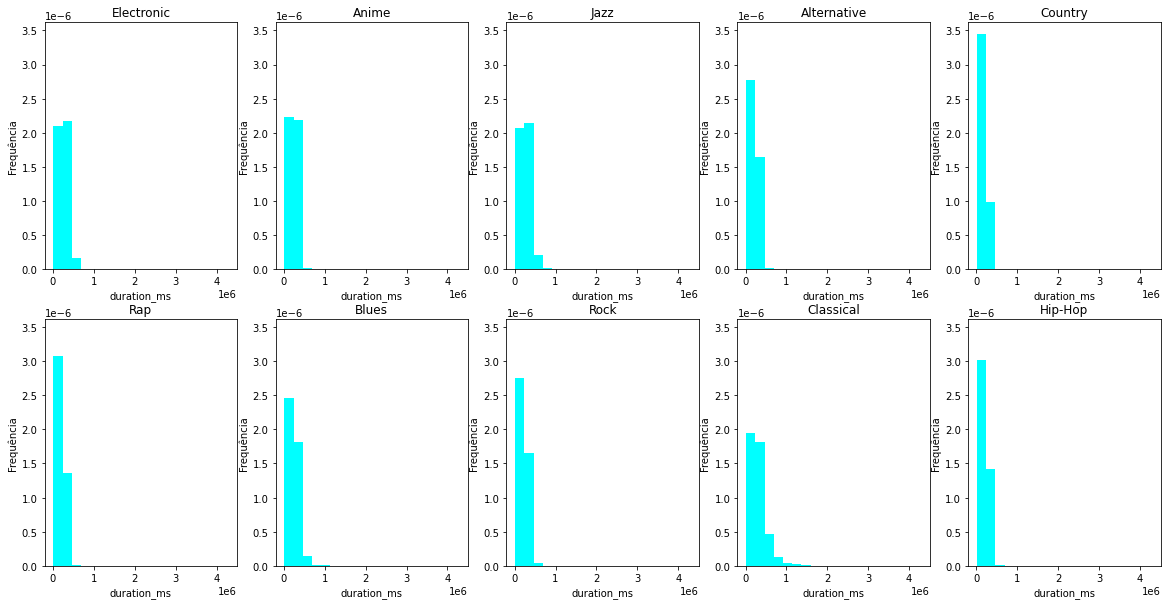

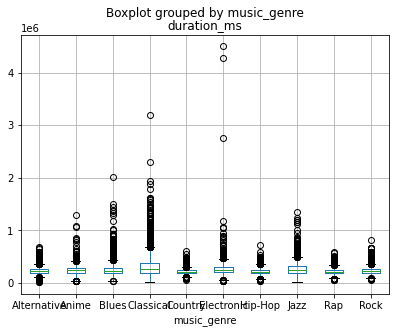

In [248]:
feature = 'duration_ms'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `energy` x `music_genre`

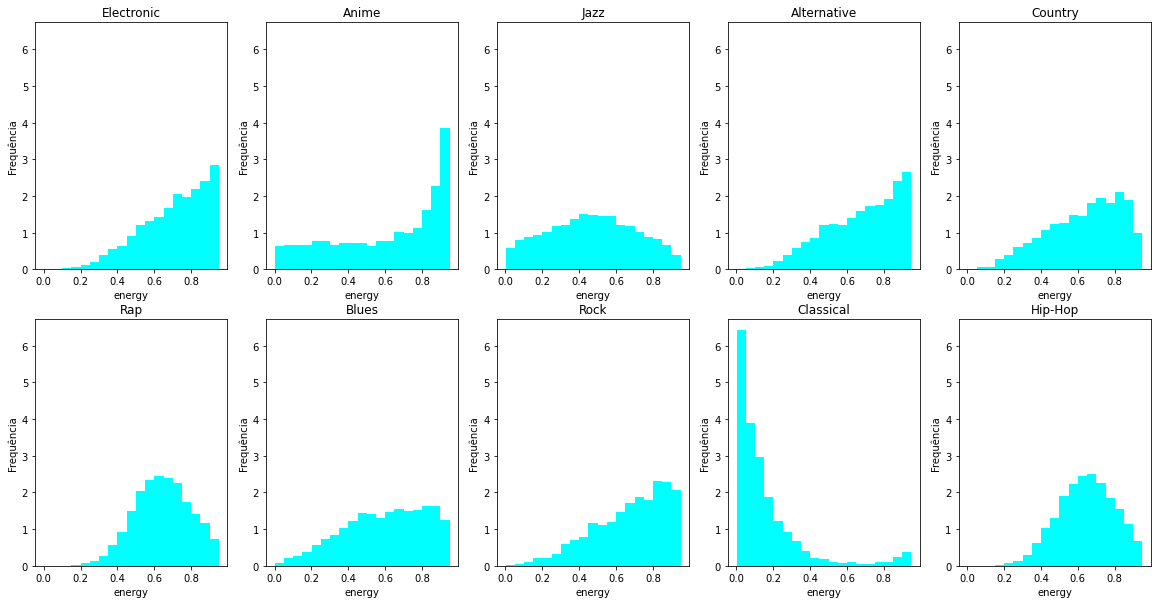

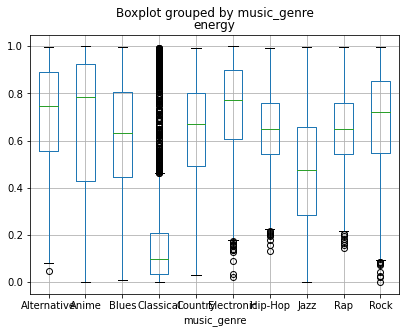

In [249]:
feature = 'energy'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `instrumentalness` x `music_genre`

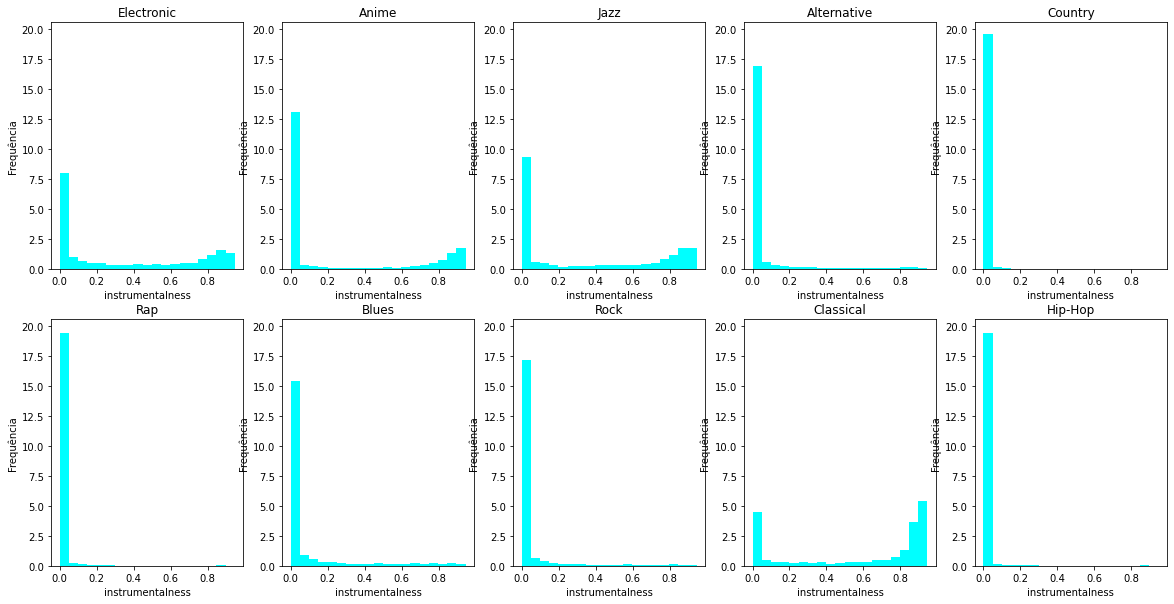

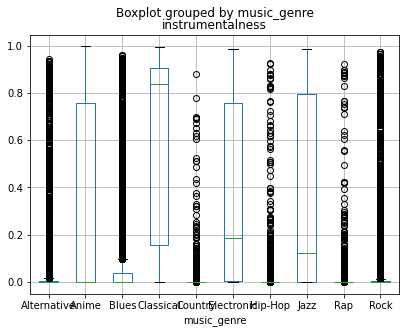

In [250]:
feature = 'instrumentalness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `liveness` x `music_genre`

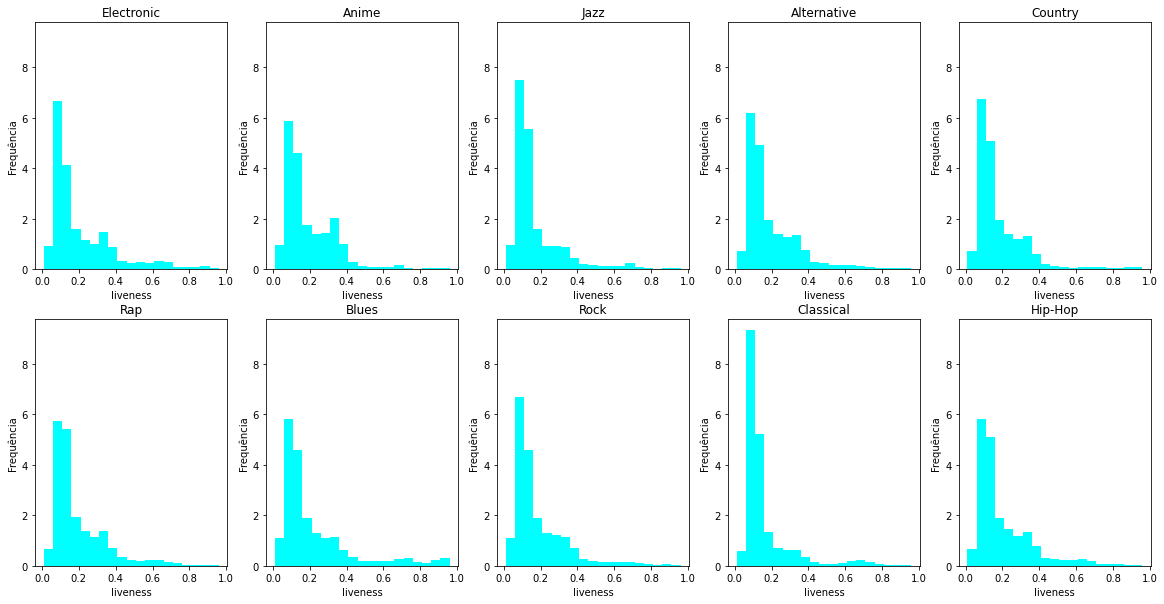

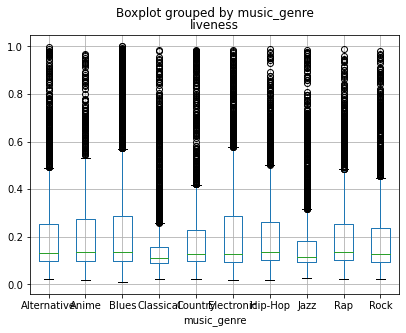

In [251]:
feature = 'liveness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `loudness` x `music_genre`

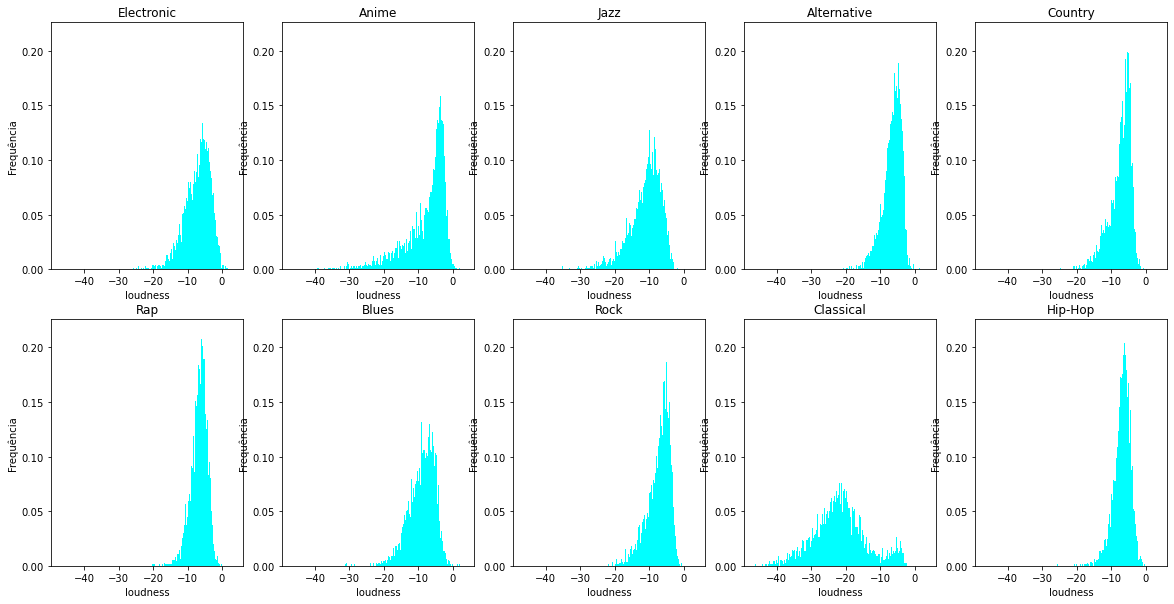

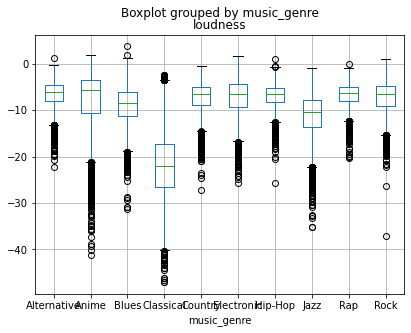

In [252]:
feature = 'loudness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `speechiness` x `music_genre`

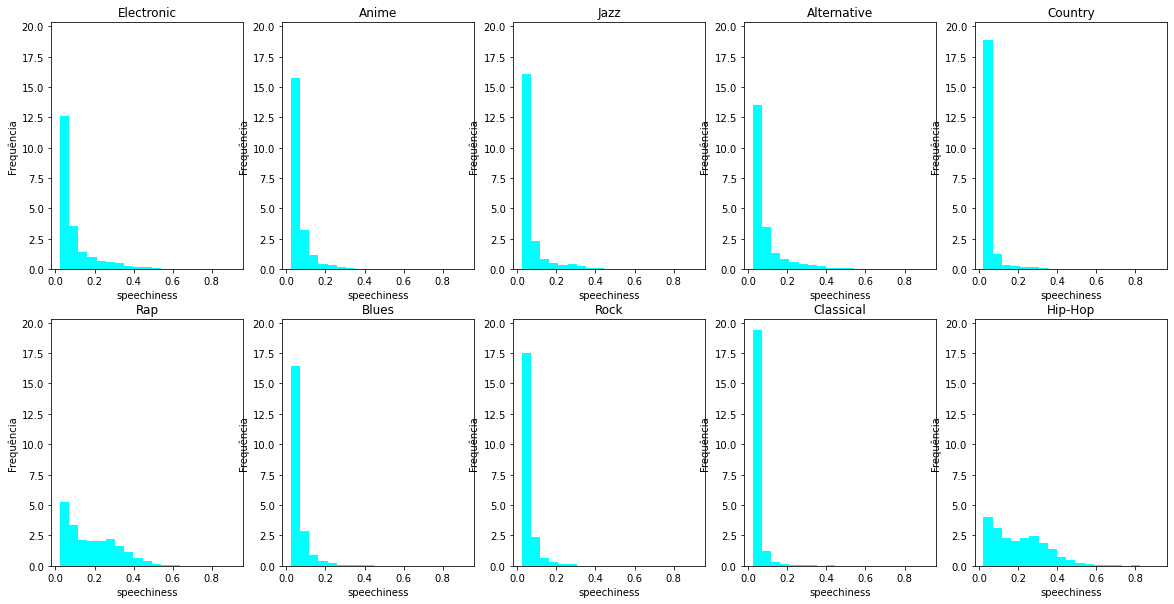

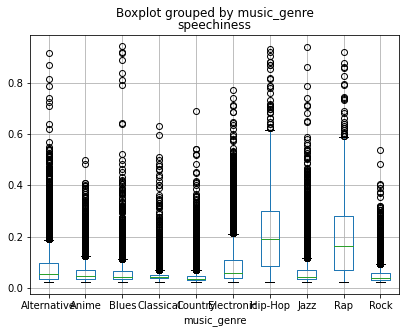

In [253]:
feature = 'speechiness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `valence` x `music_genre`

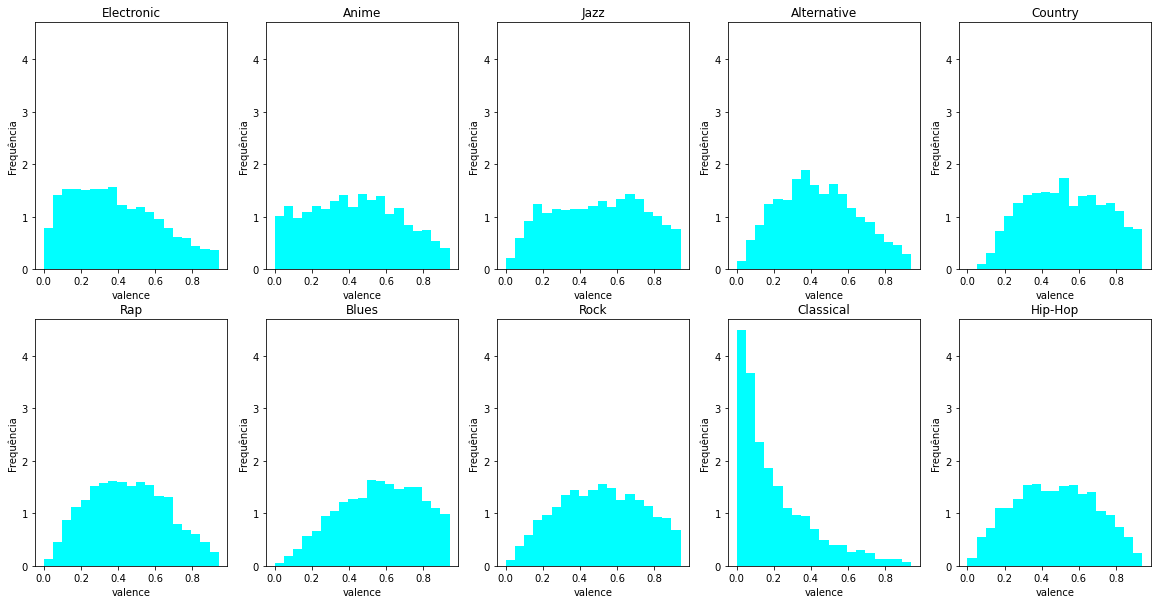

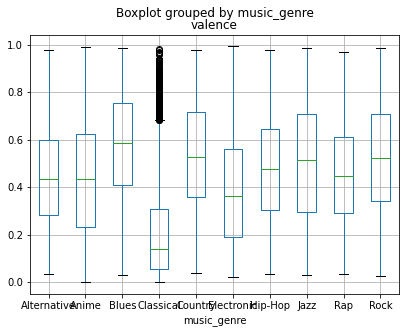

In [254]:
feature = 'valence'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

# Mapa de calor para observar as correlações das variáveis 

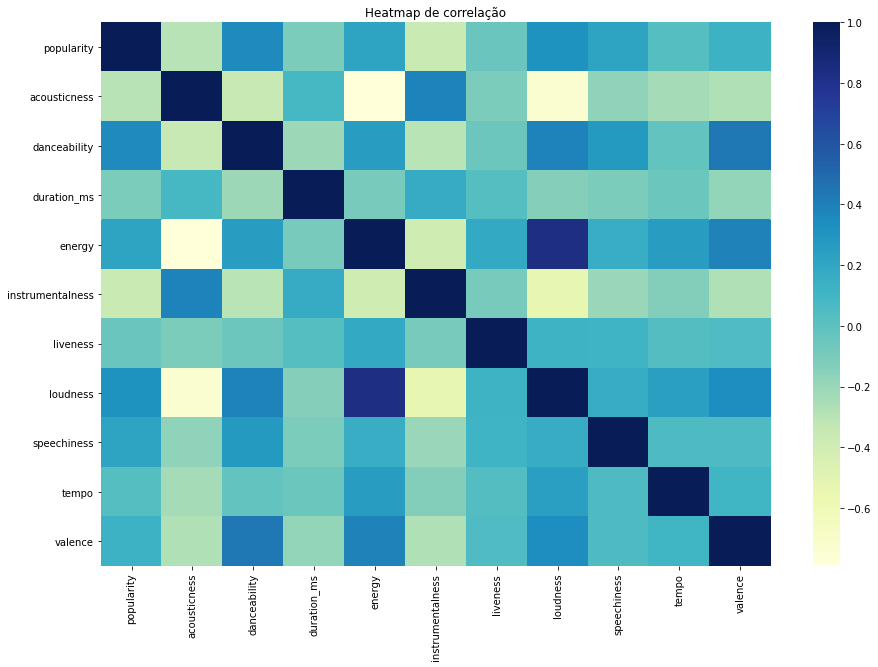

In [255]:
plt.figure(figsize = (15,10))
sn.heatmap(df.corr(), cmap="YlGnBu")
plt.title('Heatmap de correlação')
plt.show()

# **Primeiro Modelo:** Random Forest Regression
- Random Forest é um algoritmo de aprendizagem supervisionada que se baseia no método de aprendizagem em conjunto e em muitas árvores de decisão. Random Forest é uma técnica de Bagging, então todos os cálculos são executados em paralelo e não há interação entre as Árvores de Decisão ao construí-las. Dessa forma, pode ser usado para resolver tarefas de classificação e regressão.

In [256]:
rfdf = pd.get_dummies(df)

label_columns = [f'music_genre_{label_type}' for label_type in df['music_genre'].unique()]

labels = np.array(rfdf[rfdf.columns.intersection(label_columns)])

features = rfdf.drop(columns=label_columns)
feature_list = list(features.columns)
features = np.array(features)

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (30420, 25)
Training Labels Shape: (30420, 10)
Testing Features Shape: (10140, 25)
Testing Labels Shape: (10140, 10)


In [258]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs=-1)

rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [259]:
pred = rf.predict(test_features)

def remove_prefixo (s):
  return s.replace('music_genre_', '')

predictions = pd.DataFrame(pred, columns=label_columns).idxmax(axis=1).apply(remove_prefixo)
real = pd.DataFrame(test_labels, columns=label_columns).idxmax(axis=1).apply(remove_prefixo)

resultado = pd.DataFrame({
  'pred': predictions,
  'real': real
})

Finalmente, verificamos a acurácia do modelo através do `accuracy_score`.

In [260]:
print("Accuracy: {:.2f}%".format(accuracy_score(resultado.real, resultado.pred)*100))

Accuracy: 54.87%


<AxesSubplot:title={'center':'Matriz de confusão'}>

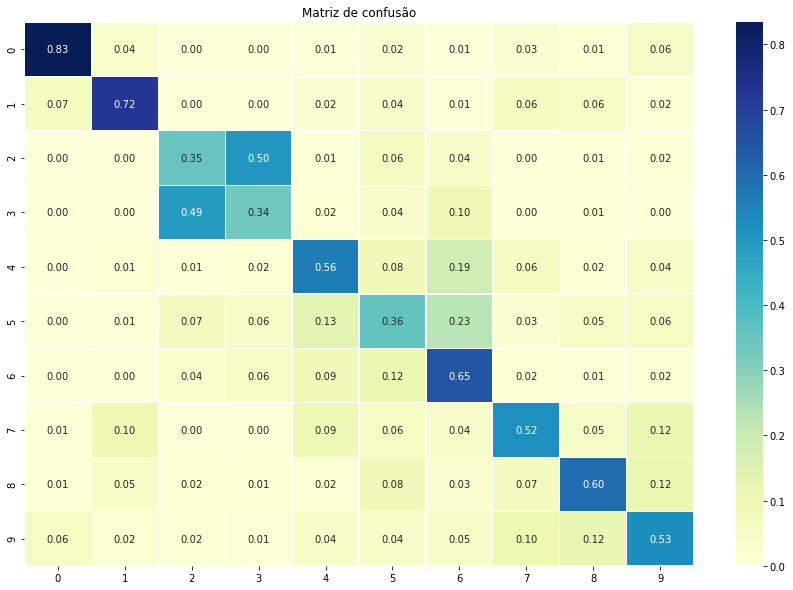

In [261]:
import sklearn.metrics as metrics
plt.figure(figsize = (15,10))
plt.title('Matriz de confusão')
matrix = metrics.confusion_matrix(resultado.real, resultado.pred, normalize='true')
sn.heatmap(matrix, annot=True, fmt=".2f",cmap="YlGnBu", linewidths=.1)

# **Segundo Modelo:** Decision Tree